## Geopandas tutorial

In [1]:
import geopandas as gpd

world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## 로컬에서 불러오기

In [2]:
import geopandas as gpd 
states = gpd.read_file('data/map/ne_110m_admin_1_states_provinces.shp')
states[['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(6)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,USA-3515,US-MT,Montana,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,USA-3516,US-ND,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,USA-3517,US-HI,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,USA-3518,US-ID,Idaho,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
5,USA-3519,US-WA,Washington,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."


In [3]:
print(type(states))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [4]:
states.shape

(51, 122)

In [5]:
states.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [6]:
states.geom_type.head()

0         Polygon
1         Polygon
2         Polygon
3    MultiPolygon
4         Polygon
dtype: object

In [7]:
states.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

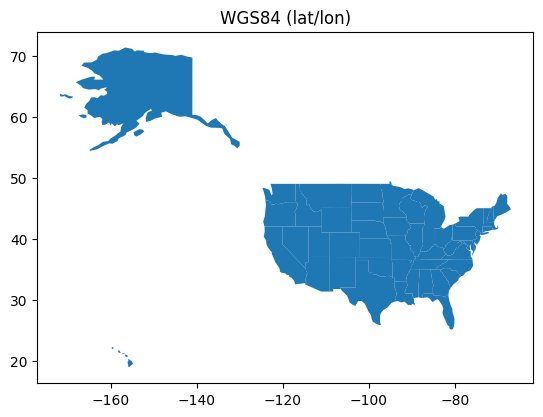

In [8]:
import matplotlib.pyplot as plt 

ax = states.plot()
ax.set_title("WGS84 (lat/lon)");
plt.savefig('output/map01.png', dpi=200)
plt.show()

In [9]:
states.to_file('data/my_file.json', driver='GeoJSON')

In [10]:
import geopandas as gpd
new_df = gpd.read_file('data/my_file.json')
new_df[['adm1_code', 'iso_3166_2', 'name', 'geometry']].head(6)

,adm1_code,iso_3166_2,name,geometry
0,USA-3514,US-MN,Minnesota,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,USA-3515,US-MT,Montana,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,USA-3516,US-ND,North Dakota,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,USA-3517,US-HI,Hawaii,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,USA-3518,US-ID,Idaho,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
5,USA-3519,US-WA,Washington,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."


## 데이터 매핑

In [11]:
import geopandas as gpd
import pandas as pd
import numpy as np
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [12]:
import pandas as pd
import numpy as np

# 가상의 데이터 생성
data = pd.DataFrame({
    'name': world['name'],
    'data': np.random.randint(100, 1000, len(world))
})

data.head()

,name,data
0,Fiji,249
1,Tanzania,191
2,W. Sahara,168
3,Canada,827
4,United States of America,667


In [13]:
# 데이터 매핑
world_df = world.merge(data, on = 'name')
world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,data
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",249
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",191
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",168
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",827
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",667


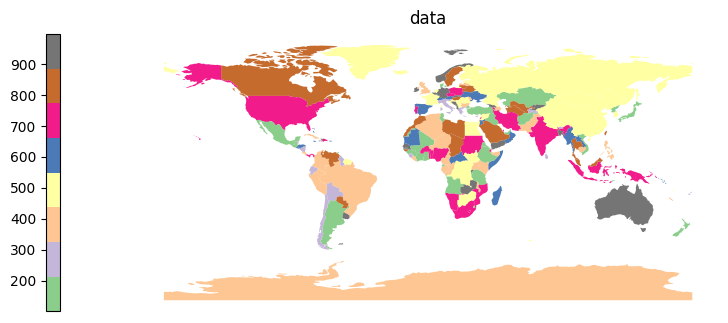

In [14]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(10, 6))
world_df.plot(ax=ax, column="data", cmap="Accent", legend=False, alpha=0.9)
ax.set_title('data')
ax.set_axis_off()

cb = fig.colorbar(ax.collections[0], ax=ax, location = 'left', shrink = 0.6)
plt.savefig('output/map02.png', dpi=200)
plt.show()

In [15]:
world.geom_type[:5]

0    MultiPolygon
1         Polygon
2         Polygon
3    MultiPolygon
4    MultiPolygon
dtype: object

In [41]:
type(world.geometry[1])

shapely.geometry.polygon.Polygon

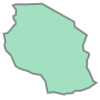

In [42]:
world.geometry[1]

In [17]:
print(world.geometry[1])

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.0598199999999451, 37.69868999999994 -3.0969899999999484, 37.7669 -3.6771200000000004, 39.20222 -4.67677, 38.74053999999995 -5.9089499999999475, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.00780999999995, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.098400000000026, 40.316586229110854 -10.317097752817492, 40.31659000000002 -10.317099999999868, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.285202325081656, 37.827639999999974 -11.26878999999991, 37.471289999999954 -11.568759999999997, 36.775150994622805 -11.594537448780805, 36.51408165868426 -11.720938002166735, 35.31239790216904 -11.439146416879147, 34.55998904799935 -11.520020033415925, 34.27999999999997 -10.160000000000025, 33.940837724096525 -9.693673841980285, 33.73972000000009 -9.4171

In [35]:
kor_geom = world[world['name'].isin(['South Korea', 'North Korea'])].geometry
kor_geom.boundary.squeeze()

95    MULTILINESTRING ((130.78000 42.22001, 130.7800...
96    LINESTRING (126.17476 37.74969, 126.23734 37.8...
dtype: geometry

In [36]:
print(kor_geom)

95    MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...
96    POLYGON ((126.17476 37.74969, 126.23734 37.840...
Name: geometry, dtype: geometry


<Axes: >

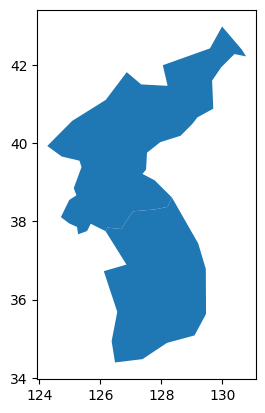

In [37]:
kor_geom.plot()

## cities

In [21]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [38]:
cities[cities['name'].isin(['Seoul', 'Pyongyang'])]

,name,geometry
154,Pyongyang,POINT (125.75274 39.02138)
194,Seoul,POINT (126.99779 37.56829)


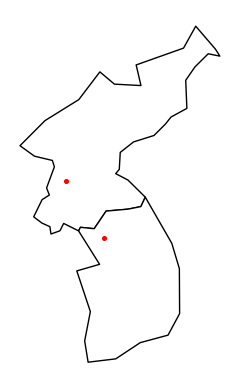

In [40]:
fig, ax = plt.subplots()
ax = kor_geom.plot(color='white', edgecolor="k", ax = ax)
ax = cities[cities['name'].isin(['Seoul', 'Pyongyang'])].plot(ax = ax, marker='o', color='red', markersize=7)
ax.set_axis_off()
plt.show()